In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import time

Generate data based on a linear equation ($y = 2x + 5$) distorted with noise.

<function matplotlib.pyplot.show(close=None, block=None)>

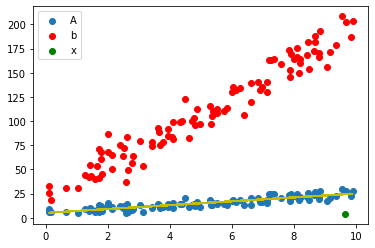

In [2]:
def lin():
    """
    Where A is an array of inputs for 'x'
    """
    li = [0]*100
    Y = [0]*100
    O = [0]*100
    for i in range(100):
        li[i] = random.random()*10
        y = 2*li[i] + 5
        Y[i] = y + np.random.normal(0,3) #adding noise
        O[i] = [li[i],Y[i]]
    return O

A = lin()

xVec = np.random.rand(2)*10
temp = np.matmul(A,xVec)
b = temp + np.random.normal(0,3,temp.shape)

def f(X, a=A,B=b):
    return 0.5*np.linalg.norm(np.matmul(a,X)-B)**2

def f_grad(X,a=A, B=b):
    return np.matmul(np.array(a).transpose(),(np.matmul(a,X)-B))

def GD(x, lamb, gradient_function):
    x1 = x - lamb*gradient_function(x)
    return x1

aaa = [0]*100
bbb = [0]*100
ccc = [0]*100
for i in range(100):
    aaa[i] = A[i][0]
    bbb[i] = A[i][1]
    ccc[i] = 2*A[i][0] + 5
plt.scatter(aaa, bbb, label = 'A')
plt.scatter(aaa, b, c = 'r', label = 'b')
plt.scatter(xVec[0], xVec[1], c = 'g', label = 'x')
plt.plot(aaa, ccc, 'y')
plt.legend(loc = 'best')
plt.show

In [3]:
xVec

array([9.6626223 , 3.93748348])

In [4]:
f_grad(xVec+random.random())

array([ 4296.04675201, 12464.60880398])

In [5]:
f(xVec + random.random())

6556.18567721217

## Nesterov Accelerated

In [27]:
xVec

array([9.6626223 , 3.93748348])

In [8]:
a = np.array(A)

In [15]:
L = np.max(np.linalg.svd( a@a.T )[1] )

In [16]:
y1 = xVec - (1/L) * f_grad(xVec)

In [17]:
y1

array([9.6682339 , 3.94823238])

In [19]:
x1 = GD(xVec, random.random(), f_grad )

In [20]:
x1

array([51.70917594, 84.47668371])

My fractured interpretation at estimating $\mu$:
$$ \mu \leq \frac{ \langle \nabla f_{x_k} - \nabla f_{x_{k-1}} , x_k - x_{k-1} \rangle } { \| x_k - x_{k-1} \|^2 } $$

Nesterov pg 63

In [21]:
mu_nom = np.dot(f_grad(x1) - f_grad(xVec), x1 - xVec)
mu_dom = np.linalg.norm(x1 - xVec)**2
mu = mu_nom/mu_dom

In [22]:
mu

29872.531052520502

In [23]:
beta_nom = np.sqrt(L) - np.sqrt(mu)
beta_dom = np.sqrt(L) + np.sqrt(mu)
beta = beta_nom/beta_dom
beta

0.005444766629921423

In [24]:
y2 = x1 - (1/L)* f_grad(x1)

In [25]:
x2 = y2 + beta*(y2 - y1)

In [26]:
x2

array([22.30472013, -0.4287599 ])

In [7]:
lam0 = 0
lam1 = 0.5*(1 + np.sqrt( 1 + 4*lam0**2))
lam2 = 0.5*(1 + np.sqrt( 1 + 4*lam1**2) )           
gam1 = (1 * lam1)/lam2

In [10]:
gam1

0.6180339887498948

In [9]:
lam2

1.618033988749895

## Barzilai-Borwein

In [11]:
def Lam_func(x2, x1, f_grad):
    return np.dot(x2 - x1, f_grad(x2) - f_grad(x1))/np.linalg.norm(f_grad(x2) - f_grad(x1))**2

----------------------


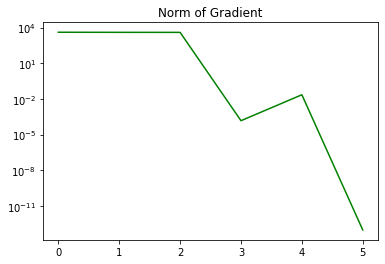

[6.40333338 0.78616679]
[0.00731949 0.02166254]
Iterations: 7
Time taken: 0.3625764846801758
Lambda:  3.813663730105004e-05


In [13]:
current = time.time()
X =[]
lam = random.random()
# print('lambda initial: ',lam)
Lambd = [lam]
# theta = 100000
# print('theta intial:', theta)
x = xVec
# print('x intial:', x)
x1 = GD(x,lam,f_grad)
# print('x1 intial:', x1)
gr2 = []
count =1
while np.linalg.norm(f_grad(x1)) > 1e-6:
    lam_prev = lam
#     min1 = np.sqrt(1 + theta)*lam
#     min2 = (np.linalg.norm(x1 - x))/(2*np.linalg.norm(f_grad(x1) - f_grad(x)))
#     print('min1:', min1)
#     print('min2:', min2)
    lam = Lam_func(x1, x, f_grad)
#     print('lambda: ',lam)
    Lambd.append(lam)
    temp = x1
    x1 = GD(x1, lam, f_grad)
#     print('x1:', x1)
    x = temp
#     print('x:', x)
#     theta = (lam/lam_prev)
#     print('theta:', theta)
    count += 1
    grad = np.linalg.norm(f_grad(x1))
#     print('Gradient Norm:', grad)
    gr2.append(grad)
print('----------------------')
plt.plot(range(len(gr2)), gr2, c='g')
plt.yscale('log')
plt.title(label = 'Norm of Gradient')
plt.show()
print(x)
print(f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lam)

\begin{align}
\text{min } \mathbf{x}: \\
f(\mathbf{x}) &= \frac{1}{2} \|A \mathbf{x} - b \|^2\\
\nabla f(\mathbf{\mathbf{x}}) &= A^T(A \mathbf{x} -b)\\
{\mathbf{x}}_{k+1} &= \mathbf{x}_k - \lambda_k \nabla f(\mathbf{x}_k)
\end{align}


## Backtracking Line Search

In [16]:
def Line(x,f,f_grad):
    alph_prime = 1
    rho = 0.5
    c = 0.1
    alph = alph_prime
    while f(x - alph*f_grad(x)) > f(x) - c*alph*np.linalg.norm(f_grad(x))**2:
#         print('LHS: ', f(x - alph*f_grad(x)))
#         print('RHS: ', f(x) - c*alph*np.linalg.norm(f_grad(x))**2)
        ## is norm the right move here?
        alph = rho*alph
#     print('Alpha:', alph)
    return alph

In [17]:
Line(xVec,f, f_grad)

6.103515625e-05

----------------------
X: [6.40333329 0.7861659 ]
Gradient: [4.60633934e-05 2.98024023e-05]
Iterations: 2944
Time taken: 60.03535866737366
Lambda:  1.8189894035458565e-12


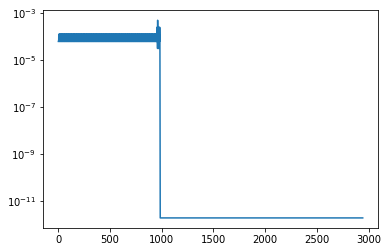

In [18]:

current = time.time()
X = []
# L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])
# lamb = 1/L
x = xVec
lamb = Line(x,f,f_grad)
step_size_list = [lamb]
gr2 = []
count = 1
while np.linalg.norm(f_grad(x)) > 1e-6:
    x1 = GD(x,lamb,f_grad)
    x = x1
    X.append(f(x))
    gr2.append(np.linalg.norm(f_grad(x)))
    count += 1
    lamb = Line(x,f,f_grad)
    step_size_list.append(lamb)
    if time.time() - current > 60:
        break
#     print('x= ', x)
#     print('lambda', lamb)
print('----------------------')
# plt.plot(range(len(gr2)), gr2)
plt.plot(range(len(step_size_list)), step_size_list)
plt.yscale('log')

print('X:', x)
print('Gradient:', f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

### Vanilla Gradient Descent

In [26]:
alph_list[980:985]

[0.000244140625,
 6.103515625e-05,
 6.103515625e-05,
 1.4901161193847656e-08,
 1.8189894035458565e-12]

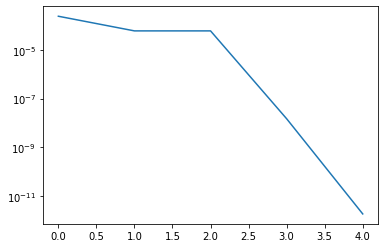

In [27]:
plt.plot(range(len(alph_list[980:985])), alph_list[980:985])
plt.yscale('log')
plt.show()

In [28]:
gr2[980:985]

[0.000124243498823773,
 7.947003602983226e-05,
 5.4876861112153264e-05,
 5.486364366084622e-05,
 5.486364366084622e-05]

In [ ]:
gr2[980:985]

In [13]:
L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])

In [14]:
L

30530.2698630936

----------------------


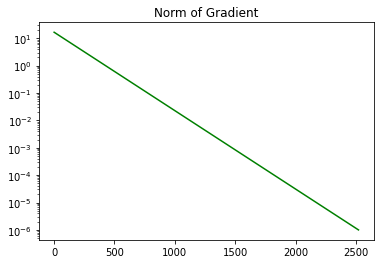

X: [2.97696038 8.03044321]
Gradient: [-9.42288779e-07  3.21379105e-07]
Iterations: 2523
Time taken: 2.5663037300109863
Lambda:  3.3275964350033194e-05


In [25]:
current = time.time()
X = []
L = np.max(np.linalg.svd(np.matmul(A,np.array(A).transpose()))[1])
lamb = 1/L
x = xVec
gr = []
count = 1
while np.linalg.norm(f_grad(x)) > 1e-6:
    x1 = GD(x,lamb,f_grad)
    x = x1
    X.append(f(x))
    gr.append(np.linalg.norm(f_grad(x)))
    count += 1
print('----------------------')
plt.plot(range(len(gr)), gr, c='g')
plt.yscale('log')
plt.title(label = 'Norm of Gradient')
plt.show()
print('X:', x)
print('Gradient:', f_grad(x))
print('Iterations:', count)
print('Time taken:', time.time() - current)
print('Lambda: ', lamb)

Adaptive Gradient Descent

----------------------
x value [2.97696039 8.03044321]
Gradient [ 8.43805026e-11 -4.51336746e-11]
Iterations: 1492
Time taken: 1.6229116916656494
Lambda:  [0.14662867626418408, 1.676633104211331e-05, 1.6637987374467706e-05, 1.7202211627091162e-05, 1.92114811118082e-05, 0.00011819078521288929, 0.0003205181531516811, 0.00020902364502613807, 0.00012146543096276834, 7.928894413074248e-05, 4.665966855210577e-05, 6.468348740012828e-05]


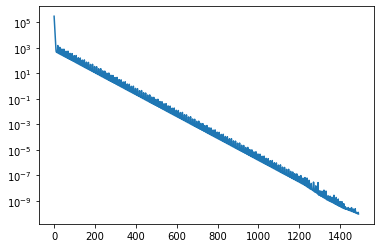

In [28]:
current = time.time()
X =[]
lam = random.random()
# print('lambda initial: ',lam)
Lambd = [lam]
theta = 100000
# print('theta intial:', theta)
x = xVec
# print('x intial:', x)
x1 = GD(x,lam,f_grad)
# print('x1 intial:', x1)
gr2 = []
count =1
while np.linalg.norm(f_grad(x1)) > 1e-10:
    lam_prev = lam
    min1 = np.sqrt(1 + theta)*lam
    min2 = (np.linalg.norm(x1 - x))/(2*np.linalg.norm(f_grad(x1) - f_grad(x)))
#     print('min1:', min1)
#     print('min2:', min2)
    lam = np.min([min1, min2])
#     print('lambda: ',lam)
    Lambd.append(lam)
    temp = x1
    x1 = GD(x1, lam, f_grad)
#     print('x1:', x1)
    x = temp
#     print('x:', x)
    theta = (lam/lam_prev)
#     print('theta:', theta)
    count += 1
    grad = np.linalg.norm(f_grad(x1))
#     print('Gradient Norm:', grad)
    gr2.append(grad)
print('----------------------')
plt.plot(range(len(gr2)) , gr2)
plt.yscale('log')
# plt.plot(range(10), gr2[:10], c='g')
# plt.title(label = 'Norm of Gradient: [0,10]')
# plt.show()
# plt.plot(range(11,50), gr2[11:50], c='g')
# plt.title(label = 'Norm of Gradient: [11,50]')
# plt.show()
# plt.plot(range(51,100), gr2[51:100], c='g')
# plt.title(label = 'Norm of Gradient: [51,100]')
# plt.show()
# plt.plot(range(101,600), gr2[101:600], c='g')
# plt.title(label = 'Norm of Gradient: [101,600]')
# plt.show()
# plt.plot(range(601,len(gr2)), gr2[601:], c='g')
# plt.title(label = 'Norm of Gradient: [601, end]')
# plt.show()

print('x value', x1)
print('Gradient', f_grad(x1))
print('Iterations:', count)
print('Time taken:', time.time() - current)
La = [Lambd[0], Lambd[1]]
for i in range(2,len(Lambd), int(np.floor(len(Lambd)/10))):
    La.append(Lambd[i])
print('Lambda: ', La)

Generating data

In [ ]:
k = 5
for i in range(100):
    globals()['x'+str(i)] = k
    k = k*2

In [ ]:
for i in range(10):
    globals()['X'+str(i)] = [0]*10
for j in range(10):
    globals()['X'+str(0)][j] = (random.random()+1e-12)*10
    y = 2*globals()['X'+str(0)][j] + 5
    noiz = 3
    for k in range(10):
        globals()['X'+str(k)][j] = y + np.random.normal(0,noiz)
        noiz += 3
A = [globals()['X'+str(i)] for i in range(10)]

In [ ]:
def linFunc(x):
    return 2*x + 5

In [ ]:
def generate(function, dim, vec_len, scale):
    """
    Where A is an array of inputs for 'x'
    """
    for i in range(dim):
        globals()['X'+str(i)] = [0]*vec_len
    for j in range(vec_len):
        globals()['X'+str(0)][j] = (random.random()+1e-12)*scale
        y = function(globals()['X'+str(0)][j])
        noiz = 3
        for k in range(dim):
            globals()['X'+str(k)][j] = y + np.random.normal(0,noiz)
            noiz += 3
    A = [globals()['X'+str(i)] for i in range(dim)]
    return(A)